# Predict Customer Clicked Ads Classification By Using Machine Learning

### **Import Libraries and Settings**

In [1]:
# Import initial necessary libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Settings of dataframe display
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = None

# Version requirements
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.1
seaborn version :  0.13.2


## Load Dataset

In [16]:
df = pd.read_csv('Clicked Ads Dataset.csv')

In [17]:
df.sample(10)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
77,77,82.73,33,381790920.0,238.99,Laki-Laki,5/20/2016 21:31,No,Tangerang,Banten,Bank
315,315,73.89,39,330123710.0,110.68,Perempuan,4/20/2016 0:41,Yes,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Bank
288,288,45.05,42,464442650.0,141.36,Perempuan,5/5/2016 11:09,Yes,Bogor,Jawa Barat,Fashion
234,234,37.32,50,397145980.0,199.25,Laki-Laki,3/30/2016 23:40,Yes,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Finance
726,726,67.47,24,423598350.0,225.05,Laki-Laki,3/20/2016 7:12,No,Denpasar,Bali,Finance
206,206,76.90,28,462754880.0,212.67,Perempuan,4/22/2016 8:31,No,Bekasi,Jawa Barat,Fashion
959,959,85.35,37,449648570.0,161.42,Laki-Laki,2/17/2016 11:15,No,Tasikmalaya,Jawa Barat,Bank
151,151,NaN,35,507674020.0,172.10,Perempuan,5/28/2016 20:41,No,Makassar,Sulawesi Selatan,Otomotif
577,577,81.21,36,443760870.0,233.04,Perempuan,1/2/2016 9:30,No,Bandung,Jawa Barat,Otomotif
563,563,62.26,37,545920970.0,166.19,Perempuan,5/26/2016 15:40,No,Jakarta Utara,Daerah Khusus Ibukota Jakarta,Travel


In [27]:
df.shape

(1000, 10)

In [18]:
# Drop index column
df.drop(columns='Unnamed: 0', inplace=True)

# Re-arrange column (target 'Clicked on Ad' at the end)
df_1 = df.drop(columns='Clicked on Ad')
df_2 = df['Clicked on Ad']
df = pd.concat([df_1, df_2], axis='columns')

# Other way to re-arrange column
# df = df[[col for col in df if col != 'Clicked on Ad'] + ['Clicked on Ad']]

In [19]:
df.sample(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,city,province,category,Clicked on Ad
724,76.76,25,353278520.0,230.77,Laki-Laki,5/26/2016 13:28,Tangerang,Banten,Finance,No
590,66.77,25,411929490.0,141.13,Perempuan,7/9/2016 11:18,Bekasi,Jawa Barat,Otomotif,Yes
522,79.16,32,486937220.0,202.90,Laki-Laki,3/30/2016 20:23,Padang,Sumatra Barat,Otomotif,No
836,49.21,46,344444800.0,115.60,Perempuan,2/28/2016 3:34,Jakarta Selatan,Daerah Khusus Ibukota Jakarta,Otomotif,Yes
879,66.03,22,415957290.0,217.37,Perempuan,5/31/2016 23:32,Surabaya,Jawa Timur,Bank,No
150,58.18,25,483789880.0,176.28,Laki-Laki,2/10/2016 6:37,Tangerang Selatan,Banten,Furniture,No
339,65.90,22,423854620.0,211.39,Perempuan,7/16/2016 14:13,Tangerang,Banten,Fashion,No
894,85.37,36,463838130.0,194.56,Laki-Laki,1/27/2016 17:08,Surabaya,Jawa Timur,Travel,No
118,84.45,50,208094530.0,207.18,Perempuan,7/13/2016 4:10,Surabaya,Jawa Timur,Fashion,Yes
685,76.27,27,420578620.0,226.69,Laki-Laki,6/18/2016 1:42,Cimahi,Jawa Barat,Travel,No


In [31]:
desc_col = []

for col in df.columns :
    desc_col.append([col, df[col].dtype, df[col].isna().sum(), round(df[col].isna().sum()/len(df) * 100, 2), df.duplicated().sum(), df[col].nunique(), df[col].unique()[:5]])

desc_df = pd.DataFrame(data=desc_col, columns='Feature, Data Type, Null Values, Null Percentage, Duplicated Values, Unique Values, 5 Unique Sample'.split(","))
desc_df

,Feature,Data Type,Null Values,Null Percentage,Duplicated Values,Unique Values,5 Unique Sample
0,Daily Time Spent on Site,float64,13,1.3,0,890,"[68.95, 80.23, 69.47, 74.15, 68.37]"
1,Age,int64,0,0.0,0,43,"[35, 31, 26, 29, 23]"
2,Area Income,float64,13,1.3,0,987,"[432837300.0, 479092950.00000006, 418501580.0, 383643260.0, 517229930.00000006]"
3,Daily Internet Usage,float64,11,1.1,0,955,"[256.09, 193.77, 236.5, 245.89, 225.58]"
4,Male,object,3,0.3,0,2,"[Perempuan, Laki-Laki, nan]"
5,Timestamp,object,0,0.0,0,997,"[3/27/2016 0:53, 4/4/2016 1:39, 3/13/2016 20:35, 1/10/2016 2:31, 6/3/2016 3:36]"
6,city,object,0,0.0,0,30,"[Jakarta Timur, Denpasar, Surabaya, Batam, Medan]"
7,province,object,0,0.0,0,16,"[Daerah Khusus Ibukota Jakarta, Bali, Jawa Timur, Kepulauan Riau, Sumatra Utara]"
8,category,object,0,0.0,0,10,"[Furniture, Food, Electronic, House, Finance]"
9,Clicked on Ad,object,0,0.0,0,2,"[No, Yes]"


**Feature Descriptions**

- `ID`: Unique identifier for each customer
- `Year_Birth`: Customer's year of birth
- `Complain`: 1 if the customer complained in the last 2 years
- `Dt_Customer`: Date of customer's registration with the company (joining date as a member)
- `Education`: Customer's level of education
- `Marital_Status`: Customer's marital status
- `Kidhome`: Number of small children in the customer's household
- `Teenhome`: Number of teenagers in the customer's household
- `Income`: Customer's household income per year
- `MntFishProducts`: Amount spent on fish products in the last 2 years
- `MntMeatProducts`: Amount spent on meat products in the last 2 years
- `MntFruits`: Amount spent on fruit products in the last 2 years
- `MntSweetProducts`: Amount spent on sweet products in the last 2 years
- `MntWines`: Amount spent on wine products in the last 2 years
- `MntGoldProds`: Amount spent on gold products in the last 2 years
- `NumDealsPurchases`: Number of purchases made with a discount
- `NumCatalogPurchases`: Number of purchases made using a catalog (buying items to be shipped via mail)
- `NumStorePurchases`: Number of purchases made directly in stores
- `NumWebPurchases`: Number of purchases made through the company's website
- `NumWebVisitsMonth`: Number of visits to the company's website in the last month
- `Recency`: Number of days since the customer's last purchase
- `Response`: 1 if the customer responded to the offer in the last campaign, 0 if not

In [ ]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()

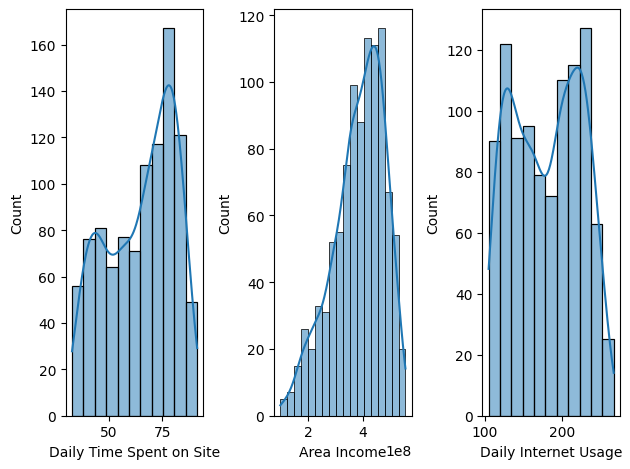

In [42]:
impute_col = ['Daily Time Spent on Site', 'Area Income', 'Daily Internet Usage']

for i in range(len(impute_col)):
    plt.subplot(1, len(impute_col), i+1)
    sns.histplot(x=df[impute_col[i]], kde=True)

plt.tight_layout()
plt.show()

In [44]:
?plt.subplot

Signature: plt.subplot(*args, **kwargs) -> 'Axes'
Docstring:
Add an Axes to the current figure or retrieve an existing Axes.

This is a wrapper of `.Figure.add_subplot` which provides additional
behavior when working with the implicit API (see the notes section).

Call signatures::

   subplot(nrows, ncols, index, **kwargs)
   subplot(pos, **kwargs)
   subplot(**kwargs)
   subplot(ax)

Parameters
----------
*args : int, (int, int, *index*), or `.SubplotSpec`, default: (1, 1, 1)
    The position of the subplot described by one of

    - Three integers (*nrows*, *ncols*, *index*). The subplot will take the
      *index* position on a grid with *nrows* rows and *ncols* columns.
      *index* starts at 1 in the upper left corner and increases to the
      right. *index* can also be a two-tuple specifying the (*first*,
      *last*) indices (1-based, and including *last*) of the subplot, e.g.,
      ``fig.add_subplot(3, 1, (1, 2))`` makes a subplot that spans the
      upper 2/3 of the figu

In [43]:
?plt.subplots

Signature:
plt.subplots(
    nrows: 'int' = 1,
    ncols: 'int' = 1,
    *,
    sharex: "bool | Literal['none', 'all', 'row', 'col']" = False,
    sharey: "bool | Literal['none', 'all', 'row', 'col']" = False,
    squeeze: 'bool' = True,
    width_ratios: 'Sequence[float] | None' = None,
    height_ratios: 'Sequence[float] | None' = None,
    subplot_kw: 'dict[str, Any] | None' = None,
    gridspec_kw: 'dict[str, Any] | None' = None,
    **fig_kw,
) -> 'tuple[Figure, Any]'
Docstring:
Create a figure and a set of subplots.

This utility wrapper makes it convenient to create common layouts of
subplots, including the enclosing figure object, in a single call.

Parameters
----------
nrows, ncols : int, default: 1
    Number of rows/columns of the subplot grid.

sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
    Controls sharing of properties among x (*sharex*) or y (*sharey*)
    axes:

    - True or 'all': x- or y-axis will be shared among all subplots.
    - False

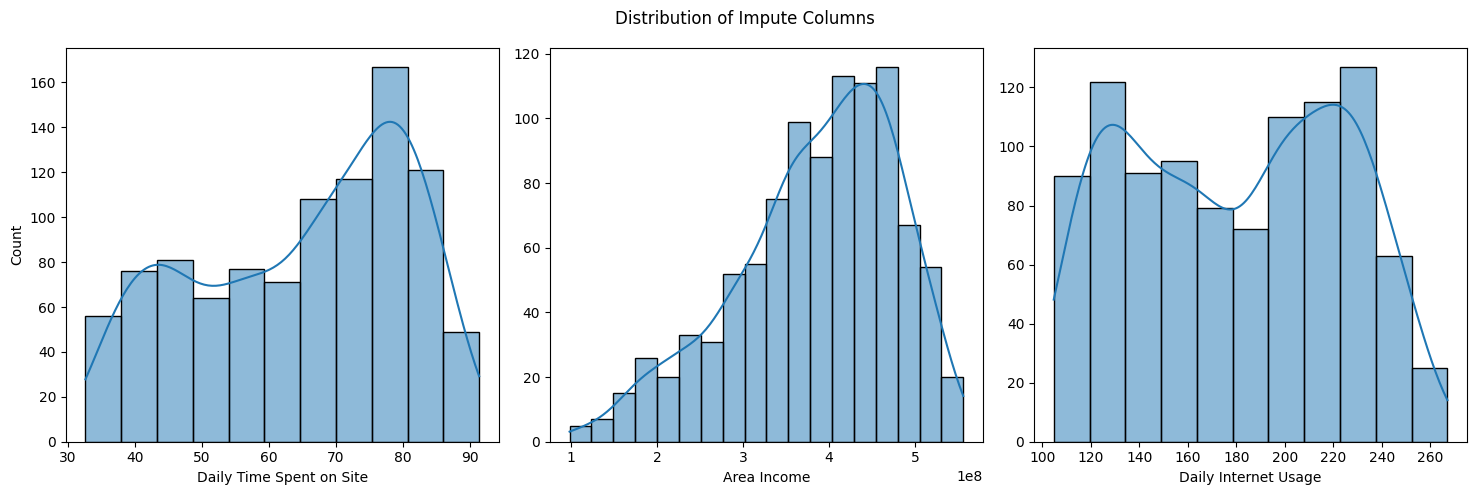

In [61]:
# Checking income distribution for imputation method
impute_col = ['Daily Time Spent on Site', 'Area Income', 'Daily Internet Usage']

fig, ax = plt.subplots(nrows=1, ncols=len(impute_col), figsize=(15, 5))

# Plot histograms for each column
for i, col in enumerate(impute_col):
    sns.histplot(data=df, x=col, kde=True, ax=ax[i])
    if i != 0:
        ax[i].set_ylabel(None)

plt.suptitle('Distribution of Impute Columns')
plt.tight_layout()
plt.show()

In [50]:
ax[1].plot(kind='hist')

[]